In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163769 sha256=6b425c61541db59a475a936c3229d960a6186a4344e642f97d3dee13c7a1c40a
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import islice
from surprise import Dataset, Reader
from surprise import BaselineOnly, NormalPredictor, SVD, SVDpp
from surprise.model_selection import train_test_split
from surprise import accuracy
import random
from sklearn.metrics import accuracy_score, mean_squared_error

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
restaurant_data = pd.read_pickle("/content/drive/MyDrive/data/final_data_restaurant_yelp.gzip")
reviews_data = pd.read_pickle("/content/drive/MyDrive/data/final_data_review_yelp.gzip")
user_data = pd.read_pickle("/content/drive/MyDrive/data/final_data_user_yelp.gzip")

In [8]:
len(reviews_data)

4724684

In [9]:
business_CA_list = restaurant_data[restaurant_data['state'] == "CA"]['business_id'].tolist()
business_CA = restaurant_data[restaurant_data['state'] == "CA"]
reviews_CA = reviews_data[reviews_data['business_id'].isin(business_CA_list)]
print(len(reviews_CA))

211748


In [10]:
reviews_CA_list = reviews_CA['user_id'].tolist()
print(reviews_CA_list[:2])
print(len(reviews_CA_list))

['59MxRhNVhU9MYndMkz0wtw', 'OhECKhQEexFypOMY6kypRw']
211748


In [19]:
user_to_review = defaultdict(set)
review_to_user = defaultdict(set)

for _, row in reviews_CA.iterrows():
    user_to_review[row['user_id']].add(row['business_id'])
    review_to_user[row['business_id']].add(row['user_id'])

In [28]:
for i in user_to_review['59MxRhNVhU9MYndMkz0wtw']:
    print(i)

print('--------------------')
for i in islice(review_to_user['gebiRewfieSdtt17PTW6Zg'], 3):
    print(i)

gebiRewfieSdtt17PTW6Zg
W7gSJz80DywKnPRIGjA2Bw
l_slvEnh4v3W8BXF1gYlcQ
--------------------
GefoSuN-_m7lTL5ef8BZbA
Lj2WXMCPic_Xa95ThYXnQw
a19tRkiGNa2XD3bazeMjDg


In [37]:
ratings = defaultdict(int)
for _, rows in reviews_CA.iterrows():
    ratings[(rows['user_id'], rows['business_id'])] = rows['stars']

In [39]:
print(ratings[('59MxRhNVhU9MYndMkz0wtw', 'gebiRewfieSdtt17PTW6Zg')])

3


In [40]:
restaurant_rating_details = defaultdict(lambda: {'sum': 0, 'count': 0})

for (user_id, business_id), stars in ratings.items():
    restaurant_rating_details[business_id]['sum'] += stars
    restaurant_rating_details[business_id]['count'] += 1


average_ratings = defaultdict(float)

# Calculate the average rating for each restaurant
for business_id, data in restaurant_rating_details.items():
    if data['count'] > 0:
        average_ratings[business_id] = data['sum'] / data['count']

In [42]:
print(average_ratings)

defaultdict(<class 'float'>, {'gebiRewfieSdtt17PTW6Zg': 3.387295081967213, 'vC2qm1y3Au5czBtbhc-DNw': 3.155688622754491, 'bbEXAEFr4RYHLlZ-HFssTA': 4.194528875379939, 'IDtLPgUrqorrpqSLdfMhZQ': 4.208226221079691, 'SZU9c8V2GuREDN5KgyHFJw': 3.906405990016639, 'Wy8Hswf2cLQGRZN6armkag': 1.5930232558139534, 'aY_n9RSaD2Yw09jSFFePew': 3.870967741935484, '18eWJFJbXyR9j_5xfcRLYA': 4.297826086956522, '29YqJwOGEuAWqlHZxMc1OA': 3.5068965517241377, '34Eqv8jXgxg_EEwcsNgeeg': 4.250379362670714, 'bjhCtlYHrkgA5Ku8l-rB3g': 3.518867924528302, 'CYwC5OjwCN6ib_AQDxi3Ow': 3.9473684210526314, 'qdpdUjdkEUpzYDdce2yZng': 4.079787234042553, '_v3DcLatG70adfYzWTd-CQ': 4.536082474226804, '6kPHr6gZaU9732ptn9gJrA': 4.140625, '0qu0fNTOsSmuREYVIMPuIQ': 4.283889980353635, 'k3lTRgvPvYUI-cX7_TAqNA': 4.921052631578948, '2bl6G1zgXUHbMGwEocqMSg': 4.852564102564102, 'kZtl_NJjUnlIQgzFrBhXyQ': 3.6696035242290748, '-Fka99c-tJ-epWYNIobqyQ': 3.5976331360946747, 'MbzgGsMQpGyVrUJXi_Jw0Q': 4.239157372986369, 'uI15YInpDsGBUZcNfm_TfQ': 3.9

In [15]:
reviews_CA[:2]

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
9,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06
23,eCiWBf1CJ0Zdv1uVarEhhw,OhECKhQEexFypOMY6kypRw,vC2qm1y3Au5czBtbhc-DNw,4,0,0,0,"Yes, this is the only sushi place in town. How...",2013-09-04 03:48:20


In [16]:
business_CA[:2]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
85,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...","Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '..."
141,SZU9c8V2GuREDN5KgyHFJw,Santa Barbara Shellfish Company,230 Stearns Wharf,Santa Barbara,CA,93101,34.408715,-119.685019,4.0,2404,1,"{'OutdoorSeating': 'True', 'RestaurantsAttire'...","Live/Raw Food, Restaurants, Seafood, Beer Bar,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."


In [11]:
users_CA = user_data[user_data['user_id'].isin(reviews_CA_list)]
print(users_CA[:5])                                                   # list of users who have reviewed a restaurant in california
print(len(users_CA))

                   user_id  review_count  useful  fans
0   qVc8ODYU5SZjKXVBgXdI7w           585    7217   267
3   SZDeASXq7o05mMNLshsdIA           224     512    28
5   q_QQ5kBBwlCcbL1s4NVK3g          1221   14953  1357
18  QF1Kuhs8iwLWANNZxebTow           607    4573   131
21  v7DwnrjzuTk7pXmuBPZnsg            39      90     6
106529


In [22]:
users_CA_sorted = users_CA.sort_values(by='useful', ascending=False)
print(users_CA_sorted[:5])

                        user_id  review_count  useful  fans
207385   --2vR0DIsmQ6WfcSzKWigw          1534  205765   880
2216     AbMjnKOwg736fcIu8apuyQ          3133  124311  1563
842189   7W-p-PJlmrzg0mk3pWKoyQ           765  117066   597
800350   ax7SnXOTIpatbsmqHLqVow           972  112557   605
1790999  Ggx8iUdJ7lsQSqXRuclXtg          3499  110553   850


In [47]:
ratings

defaultdict(int,
            {('59MxRhNVhU9MYndMkz0wtw', 'gebiRewfieSdtt17PTW6Zg'): 3,
             ('OhECKhQEexFypOMY6kypRw', 'vC2qm1y3Au5czBtbhc-DNw'): 4,
             ('4hBhtCSgoxkrFgHa4YAD-w', 'bbEXAEFr4RYHLlZ-HFssTA'): 5,
             ('bFPdtzu11Oi0f92EAcjqmg', 'IDtLPgUrqorrpqSLdfMhZQ'): 5,
             ('JYYYKt6TdVA4ng9lLcXt_g', 'SZU9c8V2GuREDN5KgyHFJw'): 5,
             ('UsBxLh14sUpO8SdeqIiGOA', 'Wy8Hswf2cLQGRZN6armkag'): 1,
             ('3inG_FUhm28tUJc0zZ2fCg', 'aY_n9RSaD2Yw09jSFFePew'): 1,
             ('C_2mNjl-doRVvsL03_T57Q', '18eWJFJbXyR9j_5xfcRLYA'): 4,
             ('QacYrFyCrFLmC726YEEBsA', '29YqJwOGEuAWqlHZxMc1OA'): 1,
             ('cpp89UW0imv45y3a_O444w', '34Eqv8jXgxg_EEwcsNgeeg'): 5,
             ('RgtbLaiU22zqaCk20HgbiQ', 'bjhCtlYHrkgA5Ku8l-rB3g'): 1,
             ('jvURGq9nyZkTF1KuSaZC_g', 'CYwC5OjwCN6ib_AQDxi3Ow'): 5,
             ('FNf6kM1wfeBeB2UW6pif7g', 'qdpdUjdkEUpzYDdce2yZng'): 4,
             ('JcUxoKPqBBRaMcHaQOYFlg', '_v3DcLatG70adfYzWTd-CQ'): 5,
   

In [51]:
# error_user = defaultdict(float)
# for _, row in users_CA_sorted[:5].iterrows():
#     restaurants = user_to_review[row['user_id']]        # restaurants reviewed by this user
#     print('restaurants: ', restaurants)
#     error = 0
#     for j in restaurants:
#         rating_given_by_user = ratings[(row['user_id'], j)]
#         average_rating = average_ratings[j]
#         print(rating_given_by_user, ' ', average_rating)
#         error += (average_rating - rating_given_by_user)**2

#     print('****************************')
#     error_user[row['user_id']] = np.sqrt(error)


error_user = defaultdict(float)
for _, row in users_CA_sorted.iterrows():
    restaurants = user_to_review[row['user_id']]        # restaurants reviewed by this user
    error = 0
    for j in restaurants:
        rating_given_by_user = ratings[(row['user_id'], j)]
        average_rating = average_ratings[j]
        error += (average_rating - rating_given_by_user)**2

    error_user[row['useful']] = np.sqrt(error)

In [52]:
print(error_user)

defaultdict(<class 'float'>, {205765: 0.10437710437710424, 124311: 1.2365473853540077, 117066: 0.47672552166934157, 112557: 1.4767255216693416, 110553: 0.5909090909090908, 106525: 0.10437710437710424, 100480: 1.3259262473951556, 76505: 0.4228971962616823, 73212: 0.9081382964849785, 70894: 1.5210437284790652, 64312: 0.20000000000000018, 59212: 1.3861217476338816, 57242: 5.858074279942959, 56130: 1.7952230932277529, 53975: 2.534885367690354, 52756: 0.6666666666666665, 50500: 0.8925711915129868, 48711: 1.4789114363617408, 48205: 4.581797262782335, 45645: 1.1756158495057143, 44783: 0.4277286135693217, 43152: 1.0990993311765564, 42959: 1.5701751210366919, 42580: 0.9217485108601221, 41970: 1.174710722801439, 41470: 1.7087072806760655, 40505: 1.0294373013308216, 39554: 1.32312925170068, 38666: 2.5495430888783894, 37768: 1.0049736056874343, 36984: 2.814715663176665, 36978: 0.4315012305168171, 36929: 2.062925170068027, 36109: 0.7171487841387859, 35382: 0.8929965643755282, 33166: 1.0999703773236

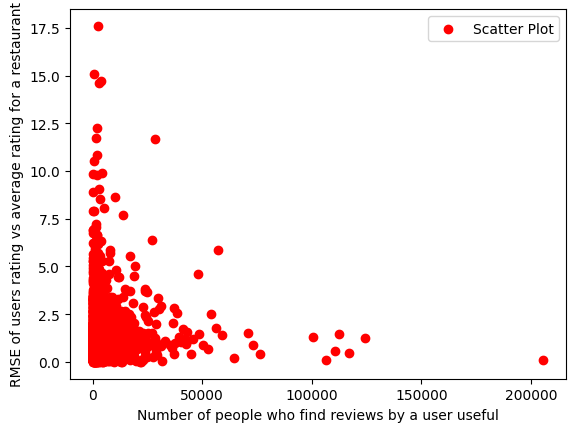

In [58]:
useful = [i for i in error_user]
rmse = [i for i in error_user.values()]

plt.scatter(useful, rmse, color='red', marker='o', label='Scatter Plot')

plt.xlabel('Number of people who find reviews by a user useful')
plt.ylabel('RMSE of users rating vs average rating for a restaurant')

plt.legend()
plt.show()

In [ ]:
len(users_CA['user_id'].tolist())

106529

In [ ]:
print(reviews_CA['stars'].min())
print(reviews_CA['stars'].max())
print(reviews_CA['stars'].std())

1
5
1.3432274537095803


In [ ]:
reviews_CA = reviews_CA[['user_id', 'business_id', 'stars']]
reviews_CA.head(2)

,user_id,business_id,stars
9,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3
23,OhECKhQEexFypOMY6kypRw,vC2qm1y3Au5czBtbhc-DNw,4


In [ ]:
# Load the data into Surprise's Dataset class
reader = Reader(rating_scale=(1, 5))
reviews_data_surprise = Dataset.load_from_df(reviews_CA, reader)

In [ ]:
reviews_train, reviews_val = train_test_split(reviews_data_surprise, random_state=42, train_size = 0.75)

In [ ]:
original_user_ids = [reviews_train.to_raw_uid(internal_user_id) for internal_user_id in reviews_train.all_users()]
print(original_user_ids)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(type(reviews_data_surprise))
print(type(reviews_val))

<class 'surprise.dataset.DatasetAutoFolds'>
<class 'list'>


In [ ]:
reviews_val[:5]

[('ItviNfLCn7VGMIMQjW8kDQ', 'bp482wqF6v80AltDNlPDfw', 5.0),
 ('WWnhqRnWWjutMqh-2SzEuQ', 'tm87DWqehpt79ZInFVmv1w', 5.0),
 ('VdGROLLl2il5-gXmdKkUMQ', 'ygZyTUWS4dbVL8d6vAiN4A', 4.0),
 ('6GXkFJDkdwHKShmo4jYJ1A', 'Tfo88MgUweNHyOMfQ6TYGw', 3.0),
 ('zJS6TPFhC_0DI2RvQgrj8g', 'RDjtVGc0c04ZIR6em1hCbQ', 5.0)]

In [ ]:
random.seed(42)
random.shuffle(reviews_val)
split_index = len(reviews_val) // 2
reviews_valid = reviews_val[:split_index]
reviews_test = reviews_val[split_index:]

In [ ]:
reviews_test[:5]

[('9-dMJvut-u1nZRy0e_yp6Q', '-TjT3y-Glfnbt6LbKETAYg', 5.0),
 ('6dtjUOpsA55eVxnP0t4OPw', 'f3eve2cxUIzyanWnHdMtFQ', 5.0),
 ('cF159aEFvFY9Sou84L4lpA', '8RlO6NuhWzXktp-1croq5A', 4.0),
 ('txkAZKo-o4688zla6jebFA', 'onLwomlGswMhhmOEAeAVEg', 4.0),
 ('CCtDaj2ioBN52tMI1tlwAA', 'EtM079Cj7-B3G7jPsGYb_Q', 3.0)]

#### Normal predictor (surprise)

Algorithm predicting a random rating based on the distribution of the training set, which is assumed to be normal.

In [ ]:
model = NormalPredictor()
model.fit(reviews_train)

predictions = model.test(reviews_val)

In [ ]:
true_label = [p.r_ui for p in predictions]
pred_label = [p.est for p in predictions]
print(mean_squared_error(true_label, pred_label))

3.2420382809358723


#### Baseline model (surprise)

Algorithm predicting the baseline estimate for given user and item.

In [ ]:
model = BaselineOnly()
model.fit(reviews_train)

predictions = model.test(reviews_val)

Estimating biases using als...


In [ ]:
print(predictions[0])

user: bp482wqF6v80AltDNlPDfw item: Bhv4zbrl8adBp4kdp-mJbA r_ui = 5.00   est = 4.34   {'was_impossible': False}


In [ ]:
true_label = [p.r_ui for p in predictions]
pred_label = [p.est for p in predictions]
print(mean_squared_error(true_label, pred_label))

1.5382038206980986


Finetuning the baseline model

In [ ]:
# ALS
epochs = [7, 10, 15, 20]
reg_i = [7, 10, 12, 14, 16]
reg_u = [7, 10, 12, 15, 18]
results = []

for j in epochs:
  for k in reg_i:
    for l in reg_u:
      bsl_options = {"method": "als", "n_epochs": j, 'reg_u': l, 'reg_i': k}
      model = BaselineOnly(bsl_options=bsl_options)
      model.fit(reviews_train)
      predictions = model.test(reviews_val)
      true_label = [p.r_ui for p in predictions]
      pred_label = [p.est for p in predictions]
      results.append({
          'num_epochs': j,
          'reg_i': k,
          'reg_l': l,
          'mse': mean_squared_error(true_label, pred_label)
      })

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimati

In [ ]:
for i in results:
  print(i)

{'num_epochs': 7, 'reg_i': 7, 'reg_l': 7, 'mse': 1.5178548294484768}
{'num_epochs': 7, 'reg_i': 7, 'reg_l': 10, 'mse': 1.523345241991697}
{'num_epochs': 7, 'reg_i': 7, 'reg_l': 12, 'mse': 1.5270045479296097}
{'num_epochs': 7, 'reg_i': 7, 'reg_l': 15, 'mse': 1.5323400875843947}
{'num_epochs': 7, 'reg_i': 7, 'reg_l': 18, 'mse': 1.5374309138122817}
{'num_epochs': 7, 'reg_i': 10, 'reg_l': 7, 'mse': 1.5240237264845595}
{'num_epochs': 7, 'reg_i': 10, 'reg_l': 10, 'mse': 1.5293643286459235}
{'num_epochs': 7, 'reg_i': 10, 'reg_l': 12, 'mse': 1.5329499174370613}
{'num_epochs': 7, 'reg_i': 10, 'reg_l': 15, 'mse': 1.5382024316508882}
{'num_epochs': 7, 'reg_i': 10, 'reg_l': 18, 'mse': 1.5432339427499009}
{'num_epochs': 7, 'reg_i': 12, 'reg_l': 7, 'mse': 1.5280284676256517}
{'num_epochs': 7, 'reg_i': 12, 'reg_l': 10, 'mse': 1.5333095796185299}
{'num_epochs': 7, 'reg_i': 12, 'reg_l': 12, 'mse': 1.5368666919533747}
{'num_epochs': 7, 'reg_i': 12, 'reg_l': 15, 'mse': 1.5420878571961976}
{'num_epochs': 

In [ ]:
# SGD
epochs = [10, 15, 20]
learning_rate = [0.004, 0.008, 0.01, 0.015]
reg = [0.008, 0.02, 0.04, 0.06]
results1 = []

for j in epochs:
  for k in learning_rate:
    for l in reg:
      bsl_options = {"method": "sgd", "n_epochs": j, 'learning_rate': k, 'reg': l}
      model = BaselineOnly(bsl_options=bsl_options)
      model.fit(reviews_train)
      predictions = model.test(reviews_val)
      true_label = [p.r_ui for p in predictions]
      pred_label = [p.est for p in predictions]
      results1.append({
          'num_epochs': j,
          'learning_rate': k,
          'reg': l,
          'mse': mean_squared_error(true_label, pred_label)
      })

Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimati

In [ ]:
for i in results1:
  print(i)

{'num_epochs': 10, 'learning_rate': 0.004, 'reg': 0.008, 'mse': 1.5570548867028915}
{'num_epochs': 10, 'learning_rate': 0.004, 'reg': 0.02, 'mse': 1.557328373883811}
{'num_epochs': 10, 'learning_rate': 0.004, 'reg': 0.04, 'mse': 1.5579055222174232}
{'num_epochs': 10, 'learning_rate': 0.004, 'reg': 0.06, 'mse': 1.5586211395170262}
{'num_epochs': 10, 'learning_rate': 0.008, 'reg': 0.008, 'mse': 1.5259735773818173}
{'num_epochs': 10, 'learning_rate': 0.008, 'reg': 0.02, 'mse': 1.5260770584268226}
{'num_epochs': 10, 'learning_rate': 0.008, 'reg': 0.04, 'mse': 1.526418475832058}
{'num_epochs': 10, 'learning_rate': 0.008, 'reg': 0.06, 'mse': 1.5269518987444104}
{'num_epochs': 10, 'learning_rate': 0.01, 'reg': 0.008, 'mse': 1.5198701830442622}
{'num_epochs': 10, 'learning_rate': 0.01, 'reg': 0.02, 'mse': 1.519901387765215}
{'num_epochs': 10, 'learning_rate': 0.01, 'reg': 0.04, 'mse': 1.5201386540030306}
{'num_epochs': 10, 'learning_rate': 0.01, 'reg': 0.06, 'mse': 1.52058486506386}
{'num_epoc

In [ ]:
num_epochs = [i['num_epochs'] for i in results1]
lr = [i['learning_rate'] for i in results1]
reg = [i['reg'] for i in results1]
mse = [i['mse'] for i in results1]

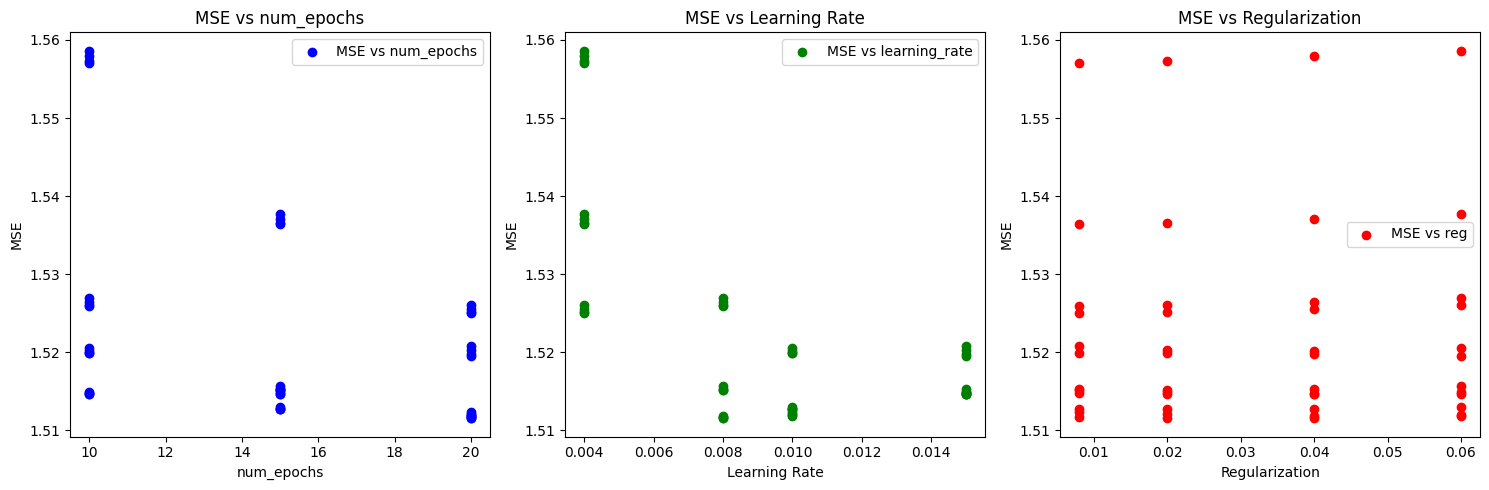

In [ ]:
# Plotting
fig = plt.figure(figsize=(15, 5))

# Plot for num_epochs vs mse
plt.subplot(1, 3, 1)
plt.scatter(num_epochs, mse, c='blue', label='MSE vs num_epochs')
plt.title('MSE vs num_epochs')
plt.xlabel('num_epochs')
plt.ylabel('MSE')
plt.legend()

# Plot for learning_rate vs mse
plt.subplot(1, 3, 2)
plt.scatter(lr, mse, c='green', label='MSE vs learning_rate')
plt.title('MSE vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.legend()

# Plot for reg vs mse
plt.subplot(1, 3, 3)
plt.scatter(reg, mse, c='red', label='MSE vs reg')
plt.title('MSE vs Regularization')
plt.xlabel('Regularization')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()

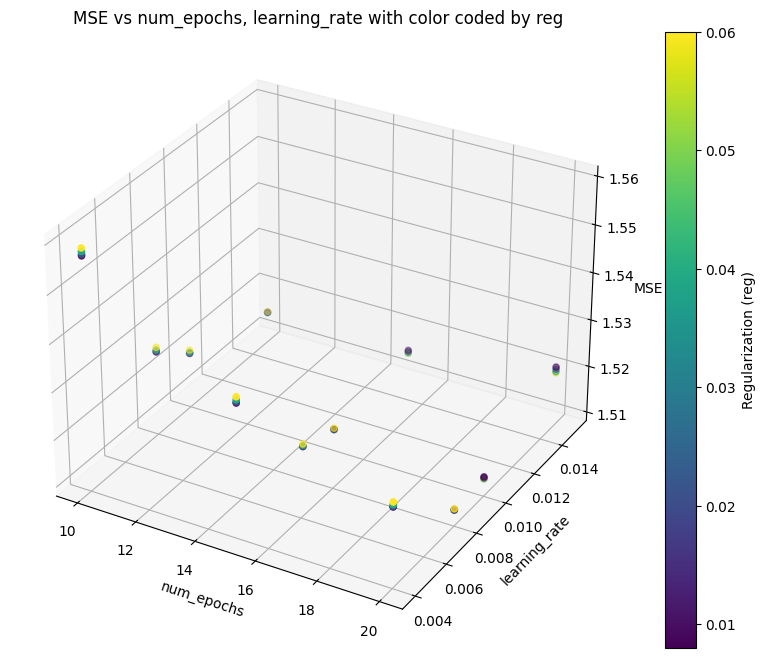

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors
scatter = ax.scatter(num_epochs, lr, mse, c=reg, cmap='viridis')

ax.set_xlabel('num_epochs')
ax.set_ylabel('learning_rate')
ax.set_zlabel('MSE')
ax.set_title('MSE vs num_epochs, learning_rate with color coded by reg')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Regularization (reg)')

plt.show()

#### SVD model (surprise)

Algorithm predicting the baseline estimate for given user and item.

Finetuning SVD model

In [ ]:
# By n_factors
num_factors = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]
results = []
for i in num_factors:
    model = SVD(n_factors=i)
    model.fit(reviews_train)

    predictions = model.test(reviews_valid)
    true_label = [p.r_ui for p in predictions]
    pred_label = [p.est for p in predictions]
    results.append({
      'n_factors': i,
      'mse': mean_squared_error(true_label, pred_label)
    })

In [ ]:
for i in results:
    print(i)

{'n_factors': 1, 'mse': 1.5117485627239284}
{'n_factors': 2, 'mse': 1.5119674109466683}
{'n_factors': 3, 'mse': 1.513280195675494}
{'n_factors': 4, 'mse': 1.5125947155438766}
{'n_factors': 5, 'mse': 1.5144402595980055}
{'n_factors': 10, 'mse': 1.5164115880641302}
{'n_factors': 15, 'mse': 1.5198178121102595}
{'n_factors': 20, 'mse': 1.5254369926708482}
{'n_factors': 25, 'mse': 1.5193937606376788}
{'n_factors': 30, 'mse': 1.5291639632860778}
{'n_factors': 40, 'mse': 1.5266509491478644}
{'n_factors': 50, 'mse': 1.5279784677285981}


Text(0, 0.5, 'MSE')

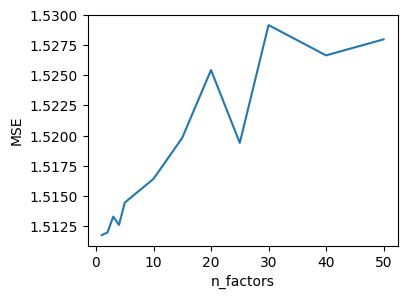

In [ ]:
plt.figure(figsize=(4, 3))
plt.plot([i['n_factors'] for i in results], [i['mse'] for i in results])
plt.xlabel('n_factors')
plt.ylabel('MSE')

In [ ]:
# By lr
lr = [0.002, 0.004, 0.007, 0.009, 0.01, 0.015, 0.02, 0.03]
results = []
for j in lr:
  model = SVD(n_factors=2, lr_all=j)
  model.fit(reviews_train)

  predictions = model.test(reviews_val)
  true_label = [p.r_ui for p in predictions]
  pred_label = [p.est for p in predictions]
  results.append({
    'lr': j,
    'mse': mean_squared_error(true_label, pred_label)
  })

In [ ]:
for i in results:
    print(i)

{'lr': 0.002, 'mse': 1.5284106723064566}
{'lr': 0.004, 'mse': 1.5109591560353026}
{'lr': 0.007, 'mse': 1.5090956463492005}
{'lr': 0.009, 'mse': 1.521358781759645}
{'lr': 0.01, 'mse': 1.5294464543457957}
{'lr': 0.015, 'mse': 1.5855164060905587}
{'lr': 0.02, 'mse': 1.621506741977308}
{'lr': 0.03, 'mse': 1.6743749522703801}


Text(0, 0.5, 'MSE')

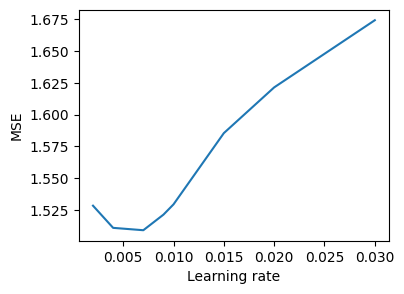

In [ ]:
plt.figure(figsize=(4, 3))
plt.plot([i['lr'] for i in results], [i['mse'] for i in results])
plt.xlabel('Learning rate')
plt.ylabel('MSE')

In [ ]:
# By reg_all
reg_values = [0.001, 0.005, 0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.2]
results = []
for i in reg_values:
    model = SVD(n_factors=2, lr_all=0.007, reg_all=i)
    model.fit(reviews_train)

    predictions = model.test(reviews_val)
    true_label = [p.r_ui for p in predictions]
    pred_label = [p.est for p in predictions]
    results.append({
      'reg_all': i,
      'mse': mean_squared_error(true_label, pred_label)
    })

In [ ]:
for i in results:
    print(i)

{'reg_all': 0.001, 'mse': 1.5290864082883842}
{'reg_all': 0.005, 'mse': 1.5219243222024563}
{'reg_all': 0.01, 'mse': 1.5132574112186383}
{'reg_all': 0.02, 'mse': 1.50915940879461}
{'reg_all': 0.03, 'mse': 1.5050794771629374}
{'reg_all': 0.05, 'mse': 1.501312912703147}
{'reg_all': 0.08, 'mse': 1.5029568160382691}
{'reg_all': 0.1, 'mse': 1.5032731888255322}
{'reg_all': 0.2, 'mse': 1.5076171877136946}


Text(0, 0.5, 'MSE')

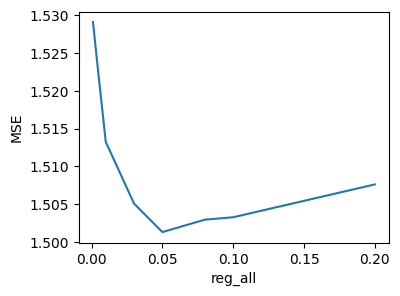

In [ ]:
plt.figure(figsize=(4, 3))
plt.plot([i['reg_all'] for i in results], [i['mse'] for i in results])
plt.xlabel('reg_all')
plt.ylabel('MSE')

In [ ]:
# By epochs
epochs = [5, 10, 15, 20, 25, 30, 35]
results = []
for i in epochs:
    model = SVD(n_factors=2, lr_all=0.007, reg_all=0.05, n_epochs=i)
    model.fit(reviews_train)

    predictions = model.test(reviews_val)
    true_label = [p.r_ui for p in predictions]
    pred_label = [p.est for p in predictions]
    results.append({
      'n_epochs': i,
      'mse': mean_squared_error(true_label, pred_label)
    })

In [ ]:
for i in results:
    print(i)

{'n_epochs': 5, 'mse': 1.5354398286965527}
{'n_epochs': 10, 'mse': 1.5153204885171743}
{'n_epochs': 15, 'mse': 1.5066138271295815}
{'n_epochs': 20, 'mse': 1.5030348754801532}
{'n_epochs': 25, 'mse': 1.5032560323480337}
{'n_epochs': 30, 'mse': 1.5090242615718934}
{'n_epochs': 35, 'mse': 1.513972796295182}


Text(0, 0.5, 'MSE')

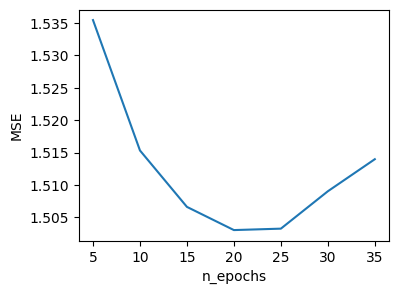

In [ ]:
plt.figure(figsize=(4, 3))
plt.plot([i['n_epochs'] for i in results], [i['mse'] for i in results])
plt.xlabel('n_epochs')
plt.ylabel('MSE')

#### Best SVD model


In [ ]:
model = SVD(n_factors=2, n_epochs=22, lr_all=0.007, reg_all=0.05)
model.fit(reviews_train)

predictions = model.test(reviews_test)

In [ ]:
true_label = [p.r_ui for p in predictions]
pred_label = [p.est for p in predictions]
print(mean_squared_error(true_label, pred_label))

1.498481152279034


In [ ]:
user_factors = model.pu
item_factors = model.qi

# Just to see
print(user_factors[:5])

[[ 0.20151845 -0.01636616]
 [ 0.13675571 -0.09543118]
 [-0.02805216 -0.14252748]
 [ 0.20457705  0.076613  ]
 [ 0.16642693  0.0669896 ]]


In [ ]:
print(user_factors.shape)
print(item_factors.shape)

(86763, 2)
(1161, 2)


In [ ]:
original_user_ids = [reviews_train.to_raw_uid(internal_user_id) for internal_user_id in reviews_train.all_users()]
print(original_user_ids)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
max_fans = users_CA['fans'].max()
max_useful = users_CA['useful'].max()
print(max_fans, ' ', max_useful)

3642   205765


In [ ]:
latent_features = []
for i in original_user_ids:
    internal_user_id = reviews_train.to_inner_uid(i)
    y = np.hstack((
        i,
        user_factors[internal_user_id],
        np.array(users_CA[users_CA['user_id'] == i]['fans'] / max_fans),
        np.array(users_CA[users_CA['user_id'] == i]['useful'] / max_useful)
        ))
    latent_features.append(y)

print(len(latent_features))
print(latent_features)

86763


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
original_item_ids = [reviews_train.to_raw_iid(internal_item_id) for internal_item_id in reviews_train.all_items()]
print(original_item_ids)

In [ ]:
item_latent_features = []
for i in original_item_ids:
    internal_item_id = reviews_train.to_inner_iid(i)
    y = np.hstack((i, item_factors[internal_item_id]))
    item_latent_features.append(y)

print(len(item_latent_features))
print(item_latent_features)